In [12]:
# Import libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Load Iris dataset
df = sns.load_dataset('iris')

# Use only the first 100 samples (2 classes: setosa & versicolor)
df = df.iloc[:100]


# Encode the target variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1

# Select features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)
print(y_prob)
y_prob1 = model.predict_proba(X_test_scaled)[:,0]
print(y_prob1)
# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_prob1))



[[0.00215447 0.99784553]
 [0.0103269  0.9896731 ]
 [0.00606254 0.99393746]
 [0.95540002 0.04459998]
 [0.97712604 0.02287396]
 [0.97749594 0.02250406]
 [0.99513934 0.00486066]
 [0.0261362  0.9738638 ]
 [0.98363125 0.01636875]
 [0.9836828  0.0163172 ]
 [0.97089258 0.02910742]
 [0.96594588 0.03405412]
 [0.01002137 0.98997863]
 [0.99457083 0.00542917]
 [0.01742037 0.98257963]
 [0.98837997 0.01162003]
 [0.00238526 0.99761474]
 [0.00159117 0.99840883]
 [0.97287291 0.02712709]
 [0.94793948 0.05206052]
 [0.01513671 0.98486329]
 [0.03921643 0.96078357]
 [0.96347121 0.03652879]
 [0.98723484 0.01276516]
 [0.02630549 0.97369451]
 [0.99191819 0.00808181]
 [0.98306037 0.01693963]
 [0.02546963 0.97453037]
 [0.97304735 0.02695265]
 [0.00152566 0.99847434]]
[0.00215447 0.0103269  0.00606254 0.95540002 0.97712604 0.97749594
 0.99513934 0.0261362  0.98363125 0.9836828  0.97089258 0.96594588
 0.01002137 0.99457083 0.01742037 0.98837997 0.00238526 0.00159117
 0.97287291 0.94793948 0.01513671 0.03921643 0.9

✅ Accuracy: 0.9111111111111111

📊 Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

🧾 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



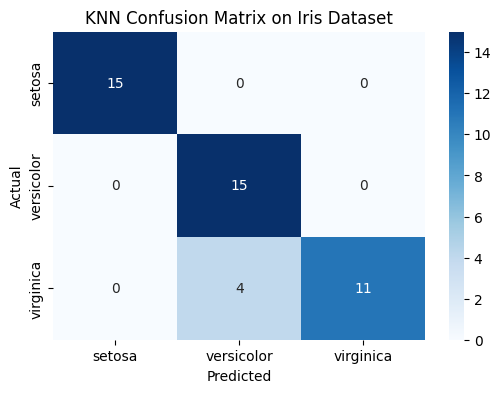

In [13]:
# Import required libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset('iris')

# Feature matrix (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (very important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN model (k=5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Optional: visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix on Iris Dataset')
plt.show()
